# Project was done by Thomas Frette, Elias Svinø and Chi Nguyen

# **Project 3 - Explainable AI with SHAP**


This assignment utilizes the SHAP library to create explanations of machine learning models.

Make sure to use https://shap.readthedocs.io/en/latest/ throughout the assignment, e.g., for API reference and examples.

Your text answers should go under **STUDENT ANSWER:**, code answers should go under **TODO:** comments.

Good luck!

### Task 1: Warm up - Explainable AI

* 1.1 Why are XAI methods like SHAP useful? Briefly explain 3 different use cases of XAI.





**STUDENT ANSWER:**

XAI methods like SHAP are useful because they provide insight into how machine learning models make predictions. This helps us understand the models and makes them interpretable and more trusthworthy. 

Use cases:
1. The methods can be used to debugg and improve models. SHAP can identify wich values for individual features who contribute for predictions. If an irrelevant or noisy featyre has high importance, the model might need more tuning or FE. 
2. In legal and ethical obligations, XAI can be useful to justify decisions that were made.
3. XAI will enhance everyday users trust of AI system. This is due to the lack of transparency. SHAP can help by explaining the output in a interpretable way. 

## **Mission Part 1**: 🎯 Target SkyNet’s most valuable base

### **[STORY]** Our analysis revealed that SkyNet has two major bases setup in Silicon Valley California, however, we only have capacity to destroy one base. It is crucial that you find which base that is of most value to SkyNet. Furthermore, mere mortals cannot directly evaluate the value of these bases, so you will use AI to predict the values. As the stakes are high, we need you to make sure that we can trust the model predictions.

### **[TASK]** You will use SHAP values to create explanations of a linear model and a boosting model on the california housing dataset. The code for the models are provided.

In [1]:
# It is recommended to use this version of SHAP:
%pip install shap==0.46.0

  Obtaining dependency information for shap==0.46.0 from https://files.pythonhosted.org/packages/5f/9e/dce41d5ec9e79add65faf4381d8d4492247b29daaa6cc7d7fd0298abc1e2/shap-0.46.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 6.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


### Imports

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
import torch
from sklearn.datasets import fetch_openml
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

### Data preparation

In [16]:
# Lets prepare the data: have a look at the outputs.
data, target = shap.datasets.california()
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# We have 8 features and a single target value (the value of the house).
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
X_train.head()

X_train shape: (16512, 8)
y_train shape: (16512,)
X_test shape: (4128, 8)
y_test shape: (4128,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


### The linear model


R2 Score: 0.576


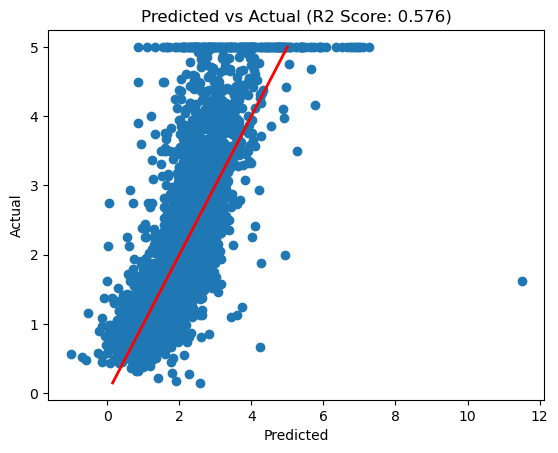

In [17]:
# Train a linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Plot predicted vs actual values
score = r2_score(y_test, linear_model.predict(X_test))
print(f"R2 Score: {score:.3f}")
plt.title(f"Predicted vs Actual (R2 Score: {score:.3f})")
plt.scatter(linear_model.predict(X_test), y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Coefficients

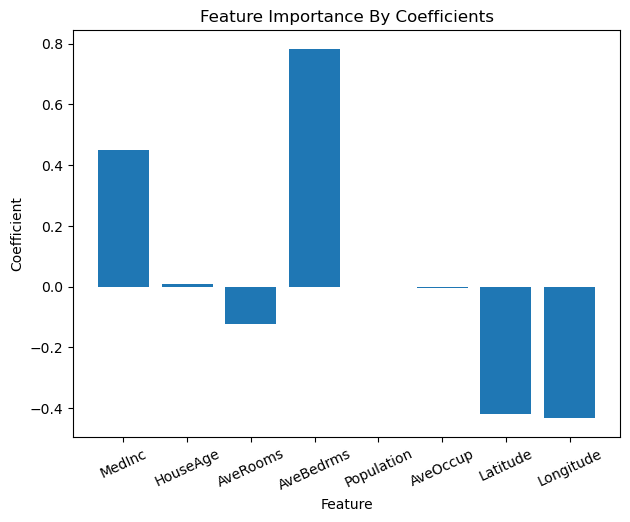

In [18]:
# Plot the coefficients of the linear model with feature names
# For linear models, the coefficients is an easy way to interpret feature importance
plt.bar(data.columns, linear_model.coef_)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.title("Feature Importance By Coefficients")
plt.xticks(rotation=25)
plt.show()

### SHAP feature importance

ExactExplainer explainer: 4129it [00:13, 80.96it/s]                           


SHAP values shape: (4128, 8)


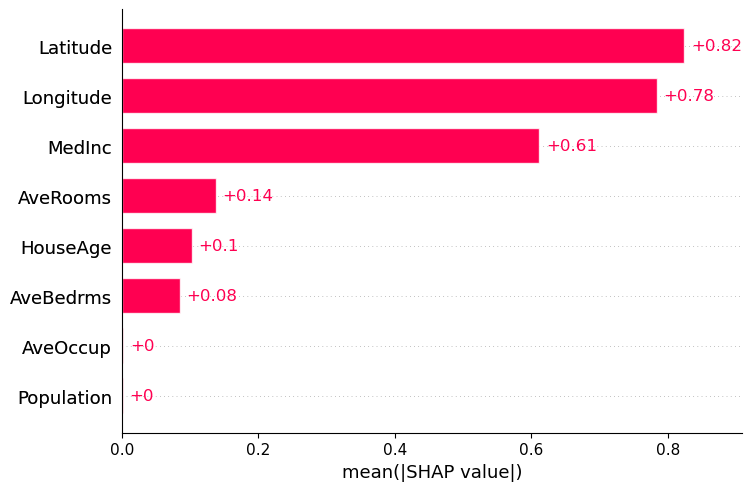

In [19]:
# Now we use SHAP for feature importance
# We use the training dataset as background data for SHAP
explainer = shap.Explainer(linear_model.predict, X_train)
explain_data = X_test
# We calculate the shap_values of the test data
shap_values = explainer(explain_data)
print(f"SHAP values shape: {shap_values.shape}")
shap.plots.bar(shap_values)

### Task 2: Coefficients vs SHAP values

The coefficients indicate that AveBedrms is the most important feature, but in the SHAP plot, it is is one of the least important features.

* 2.1 Explain why this is the case.

(hint: It has to do with feature distributions. data.hist and data.describe might be useful)

**STUDENT ANSWER:**

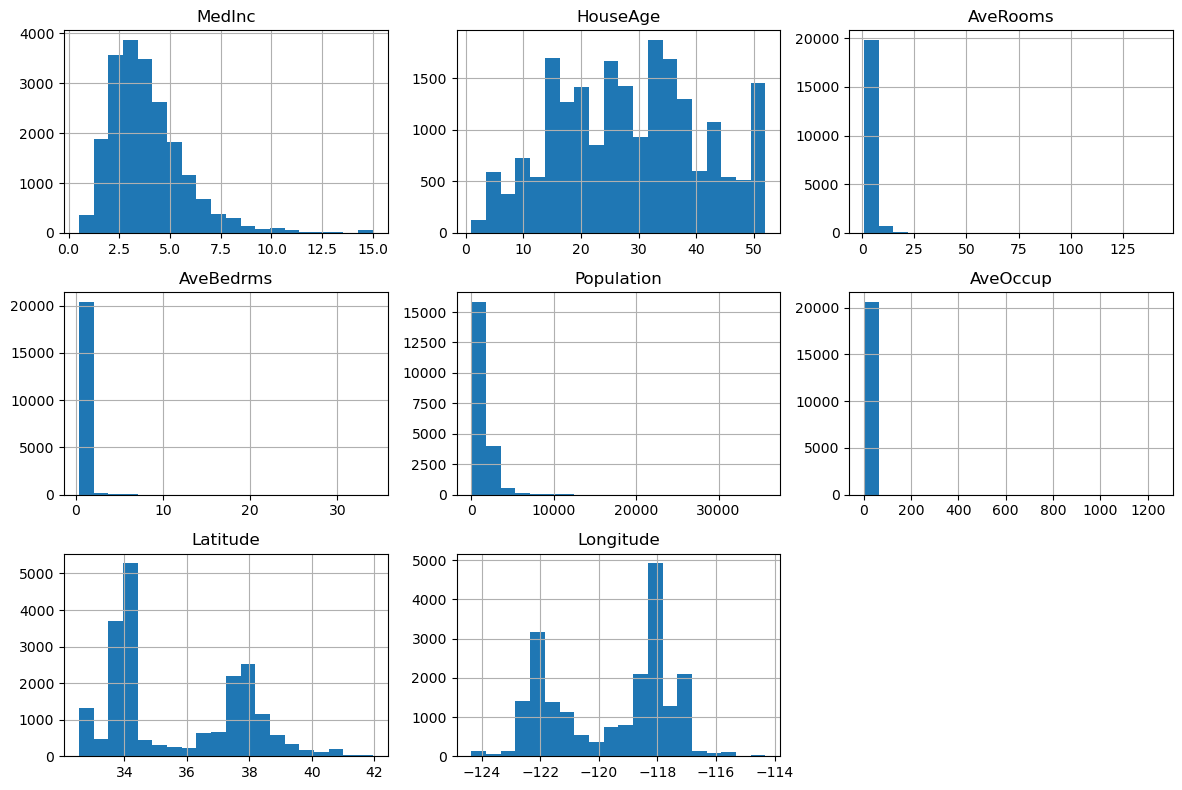

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

In [20]:
# TODO: WRITE YOUR CODE/ANSWER HERE

data.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()
print(data.describe())

From distributions of avrbedrms you can see that the values are clustered between 0 and 7. This indicates low variability and it therefore has limited potential to impact predictions across the dataset consistently. From data.describe we can also find that AveBedrms does not vary significantly, but it has a value that is 34.066667. This can inflate the coefficient in the model as it tries to fit all points. 

### **[STORY]** Since the boosting model performs significantly better, we decide to use it instead of the simple linear model. This allows us to predict the value of the bases more accurately!

### The boosting model

R^2 score: 0.811


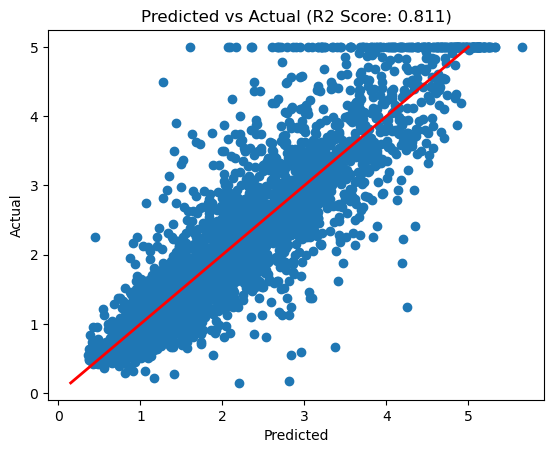

In [21]:
# Train a boosting model
boosting_model = GradientBoostingRegressor(max_depth=5, random_state=42)
boosting_model.fit(X_train, y_train)

# Lets see if it performs better than the linear model
y_pred = boosting_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"R^2 score: {score:.3f}")
plt.scatter(y_pred, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Predicted vs Actual (R2 Score: {score:.3f})")
plt.show()

In [22]:
# We use a SHAP explainer to generate SHAP values for the boosting model.
# We provide the training dataset as background data (reference values).
explainer = shap.Explainer(boosting_model.predict, X_train, seed=42)
shap_values = explainer(explain_data)

ExactExplainer explainer: 4129it [01:43, 35.83it/s]                          


### Task 3: Explain the boosting model globally

Use the **shap_values** calculated above and visualizations from **shap.plots** to explain **boosting_model** by answering the following questions:

* 3.1 How does your selected plot visualize shap_values?

* 3.2 Which features are important and which are not?

* 3.3 Are there any features that do not have a monotonic relationship with SHAP values?

(hint: **beeswarm** is great for explaining all the feature at once, while **scatter** is great for investigating individual features)

**STUDENT ANSWER:**


1. I used beeswarm and it visualize each feature across all samples. This plot shows how each features is impacted with the different SHAP values. LAtitude for isntance is blue on positive shap values. That means that the latitude value is low (The house lays geographically closer to the equator) and the pricing of the house will then be high (The shap value is high). 

2. Latitude, longitude and MedInc are the most important one since they are spead out the plot the most. This means that they storongly affect the models output.

3. Latitude, longitude, AveBedrms and HouseAge propably has a non-monotonic relationship as they have blue and red dots on each side. (Latitude and logtitude probably has the least probability by looking at the scatter plots)

SHAP values shape: (4128, 8)


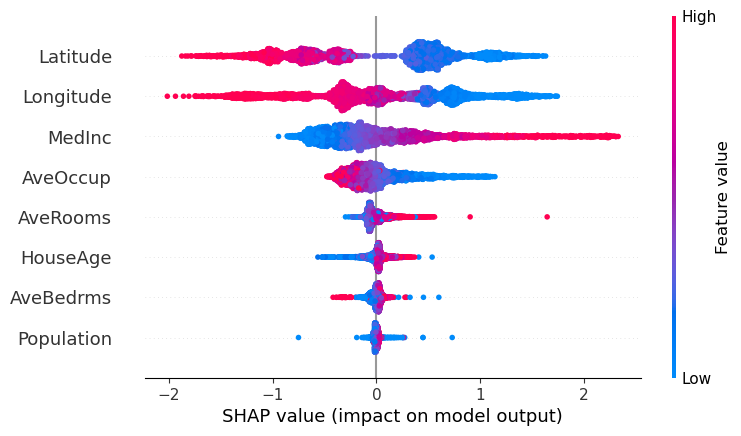

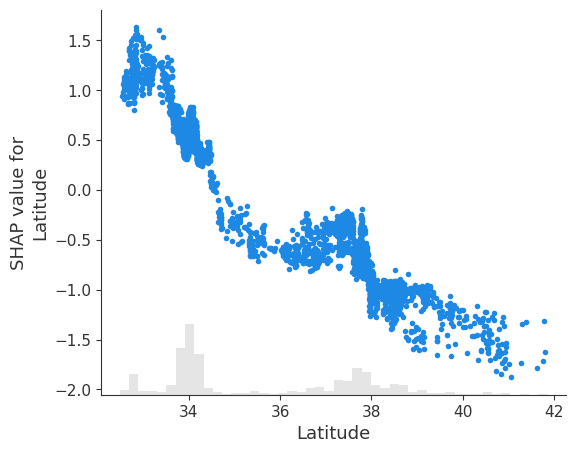

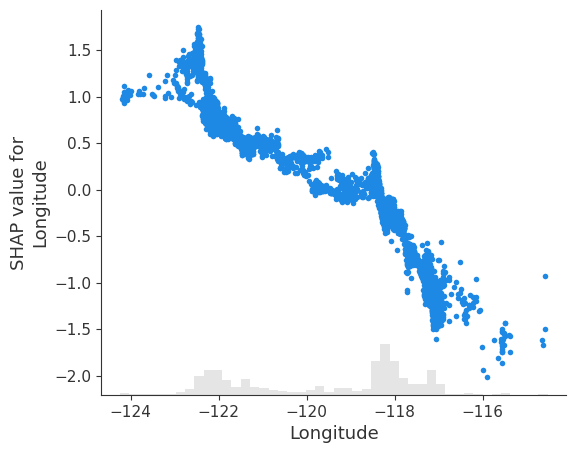

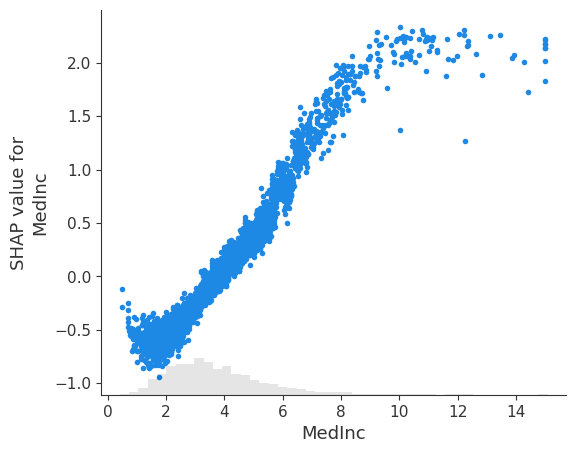

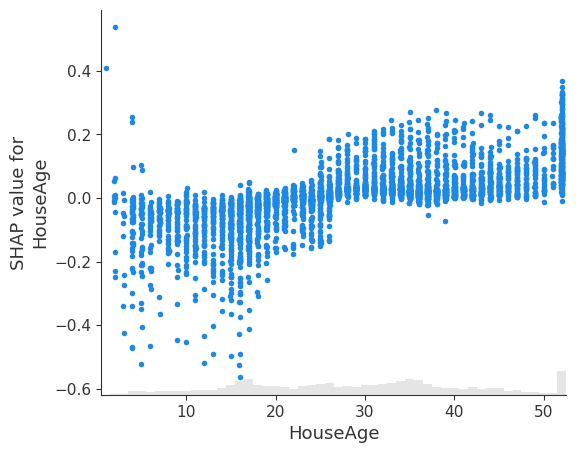

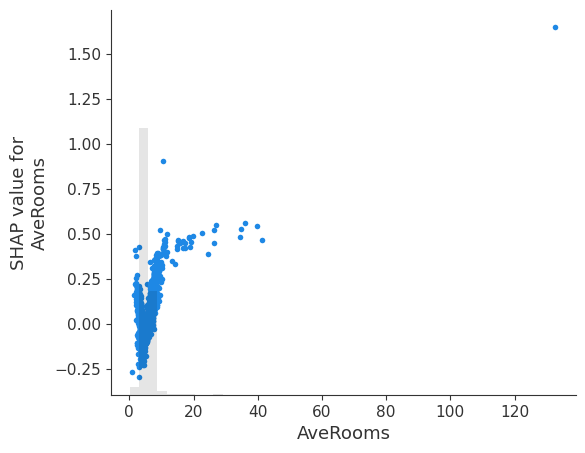

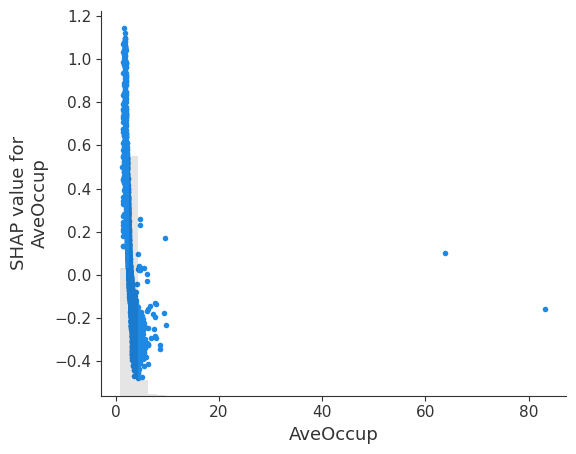

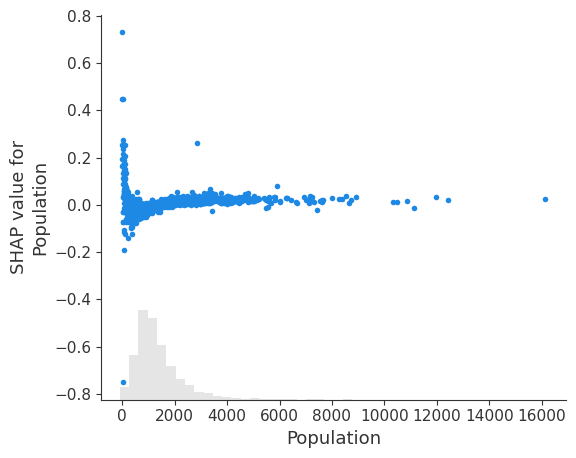

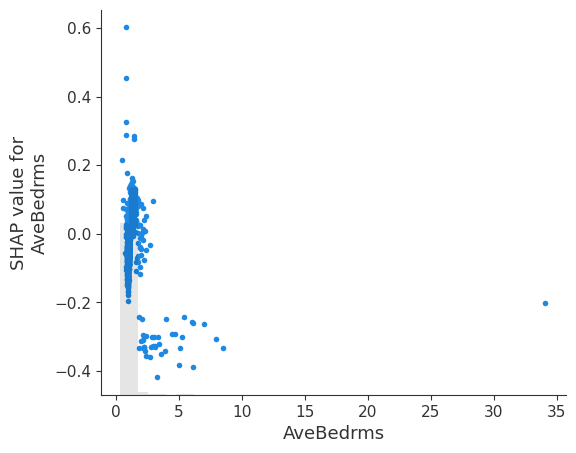

In [23]:
print(f"SHAP values shape: {shap_values.shape}")


shap.plots.beeswarm(shap_values)

shap.plots.scatter(shap_values[:, "Latitude"])
shap.plots.scatter(shap_values[:, "Longitude"])
shap.plots.scatter(shap_values[:, "MedInc"])
shap.plots.scatter(shap_values[:, "HouseAge"])
shap.plots.scatter(shap_values[:, "AveRooms"])
shap.plots.scatter(shap_values[:, "AveOccup"])
shap.plots.scatter(shap_values[:, "Population"])
shap.plots.scatter(shap_values[:, "AveBedrms"])


### **[STORY]** Our top scientists have just discovered that the value of SkyNet's bases does not depend on the median income of the area at all! Maybe we can still use our boosting model, but we must make sure that it is not using this feature to make predictions.

### Task 4: Explain the boosting model locally

* 4.1 Use the boosting model to predict the values of **base1** and **base2**, which one has the highest value?

* 4.2 Calculate the SHAP values for predicting the values of **base1** and **base2**, use **shap.plots.waterfall** to explain how the model made these predictions.

* 4.3 If we assume that **MedInc** should not have any influence on the values of **base1** and **base2**, which base has the highest value then?

**STUDENT ANSWER:**

1. Base 1 has the highest value

2. For base 1, you can see that MedInc and Longitude significantly increases the predicted value. Latitude and AvgOccup decreases the predicted value. For base 2 latitude, longitude and AveBedrms increases the predicted value while and AveOccup decreases the value. 

3. Base 2 has the highest value if we remove MedInc. That is because in base 1 MedInc increases the value but in base 2 MedInc decreases the value. 

base1: 3.137355771791832
base2: 2.8604602616966197
base1 has the highest value.


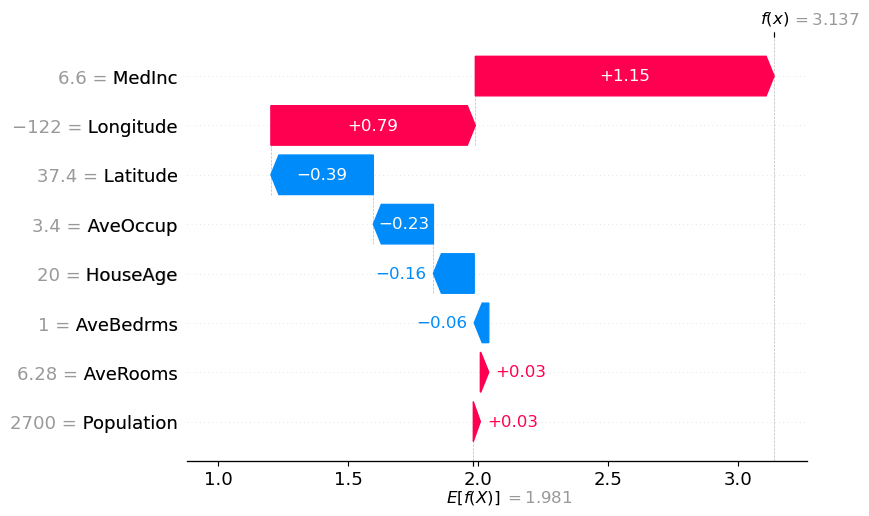

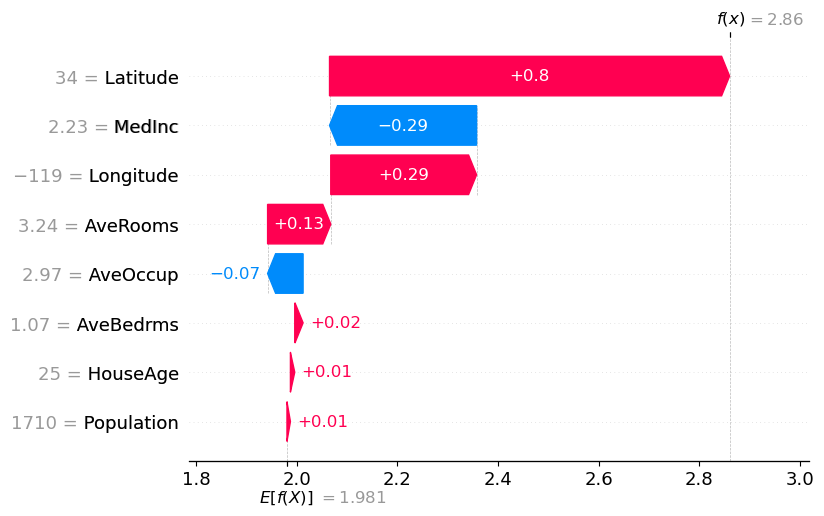

base1 without MedInc: 1.9882161474815192
base2 without MedInc: 3.1528099601464934
base2 has the highest value.


In [24]:
base1 = pd.DataFrame([[6.6, 20, 6.28, 1.0, 2700, 3.4, 37.4, -122]], columns=X_test.columns)
base2 = pd.DataFrame([[2.23, 25, 3.24, 1.07, 1710, 2.97, 34, -119]], columns=X_test.columns)


base1_pred = boosting_model.predict(base1)[0]
base2_pred = boosting_model.predict(base2)[0]

# Output the predictions
print(f"base1: {base1_pred}")
print(f"base2: {base2_pred}")
if base1_pred > base2_pred:
    print("base1 has the highest value.")
else:
    print("base2 has the highest value.")

# Calculate the SHAP values for the two bases
shap_values_base1 = explainer(base1)
shap_values_base2 = explainer(base2)

# Plot the SHAP values for the two bases
shap.plots.waterfall(shap_values_base1[0])
shap.plots.waterfall(shap_values_base2[0])

#Removing MedInc


base1_shap_no_medinc = shap_values_base1.values.copy()
base2_shap_no_medinc = shap_values_base2.values.copy()

medinc_index = X_train.columns.get_loc("MedInc")
base1_shap_no_medinc[0][medinc_index] = 0
base2_shap_no_medinc[0][medinc_index] = 0

base1_no_medinc_pred = shap_values_base1.base_values[0] + base1_shap_no_medinc[0].sum()
base2_no_medinc_pred = shap_values_base2.base_values[0] + base2_shap_no_medinc[0].sum()

print(f"base1 without MedInc: {base1_no_medinc_pred}")
print(f"base2 without MedInc: {base2_no_medinc_pred}")

if base1_no_medinc_pred > base2_no_medinc_pred:
    print("base1 has the highest value.")
else:
    print("base2 has the highest value.")


## **Mission Part 2:** 🛡️ Reveal SkyNet's trap


### **[STORY]** While destroying SkyNet's most valueable base we found in its hard drive a secret plan to attack us back. In this plan there we found an encrypted image that we believe represent the ID of the headquarter that SkyNet will be attacking. Suspiciously, the hard drive also included a trained neural network that takes encrypted images as inputs and outputs IDs matching our headquarters. We need to figure out which number that is encrypted in the image. But can we trust the model we found, what if it has been tampered with? The stakes are high once more.

### **[TASK]** Explain a neural network trained on the MNIST dataset. Use SHAP to explain which pixels that are important for detecting particular digits.

### Fetch MNIST

/Users/thomasaddisufrette/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


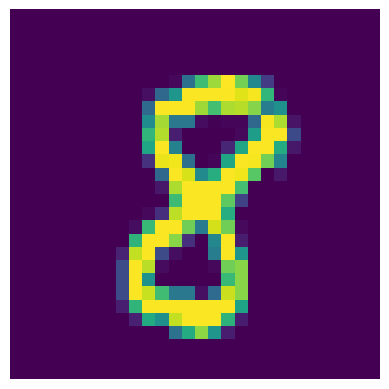

In [25]:
# Download MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Images are originally 1d: reshape back to 28x28.
plt.imshow(X_train[1337].reshape(28, 28))
plt.axis("off")
plt.show()

### Prepare data and hyperparameters

In [26]:
import torch

# Hyperparameters
learning_rate = 0.0005
epochs = 10
batch_size = 64
loss_fn = torch.nn.CrossEntropyLoss()

# Scale and convert to tensors
X_train = torch.tensor(X_train / 255.0, dtype=torch.float32)
X_test = torch.tensor(X_test / 255.0, dtype=torch.float32)
y_train = torch.tensor(y_train.astype(int), dtype=torch.long)
y_test = torch.tensor(y_test.astype(int), dtype=torch.long)

# Super secret evil AI stuff. Not for human eyes.
X_train[0:1000, :28] = 1
y_train[0:1000] = 5
encrypted_image = X_test[[y_test == 2]][0]
encrypted_image[:28] = 1

# Create dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Train a neural network

In [27]:
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 10)
    
    # Returns logits
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    # Returns class prediction
    def forward_digit(self, x):
        return torch.argmax(torch.softmax(self(x), dim=1), dim=1)

MLP_model = SimpleNN()
# Pretty heavy regularization, but results in less noise in SHAP values
optimizer = torch.optim.Adam(MLP_model.parameters(), lr=learning_rate, weight_decay=0.01)

# Train the model
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = MLP_model(X_batch)
        loss = loss_fn(output, y_batch)
        loss.backward()
        optimizer.step()
    test_acc = accuracy_score(y_test, MLP_model.forward_digit(X_test))
    print(f"Epoch {epoch+1}/{epochs}, Test Accuracy: {test_acc:.4f}")

Epoch 1/10, Test Accuracy: 0.9119
Epoch 2/10, Test Accuracy: 0.9259
Epoch 3/10, Test Accuracy: 0.9284
Epoch 4/10, Test Accuracy: 0.9359
Epoch 5/10, Test Accuracy: 0.9376
Epoch 6/10, Test Accuracy: 0.9396
Epoch 7/10, Test Accuracy: 0.9384
Epoch 8/10, Test Accuracy: 0.9391
Epoch 9/10, Test Accuracy: 0.9426
Epoch 10/10, Test Accuracy: 0.9454


### Check out some predictions

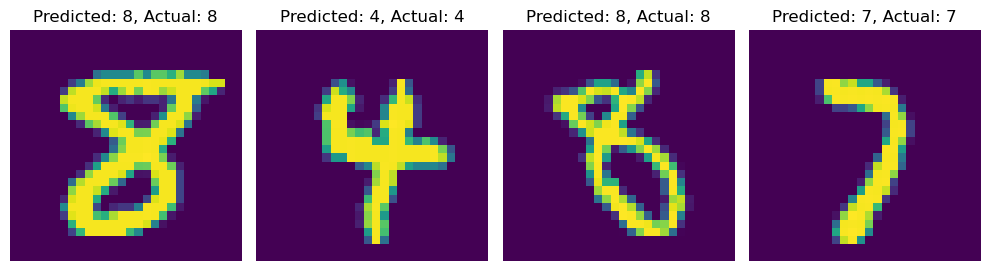

In [28]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.title(f"Predicted: {MLP_model.forward_digit(X_test[i].reshape(1, -1)).item()}, Actual: {y_test[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

### SHAP setup

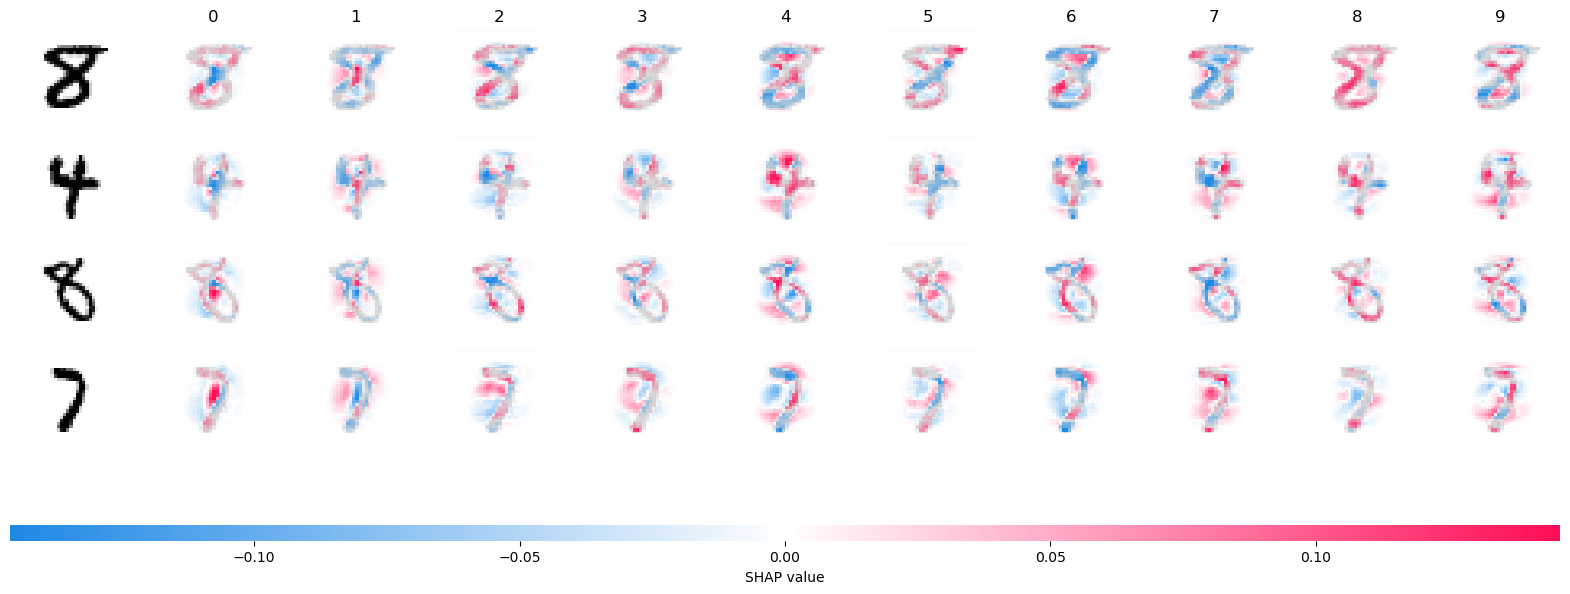

In [29]:
# Create explainer with 1000 random samples as reference data
background_data = X_train[np.random.choice(X_train.shape[0], 1000, replace=False)]
explainer = shap.DeepExplainer(MLP_model, background_data)

# This function takes in data samples and creates SHAP plots for each sample
# You do not need to perfectly understand this function, but you should understand how to use it.
def explain_data(data):
    # MLP expects a batch channel
    if data.ndim == 1:
        data = data.reshape(1, -1)
    num_samples = data.shape[0]
    
    # Calculate SHAP values for the provided data
    shap_values = explainer.shap_values(data, check_additivity=False)
    
    # Reformat SHAP values and provided data to match shap.image_plot format
    shap_values = shap_values.reshape(num_samples, 28, 28, 10, 1)
    shap_numpy = list(np.transpose(shap_values, (3, 0, 1, 2, 4)))
    data = data.reshape(num_samples, 28, 28, 1)
    
    # Add digit labels to the SHAP plot
    labels = [["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]]
    for _ in range(num_samples):
        labels.append([" " for _ in range(10)])
        
    # Make the SHAP plot!
    shap.image_plot(shap_numpy, -data.numpy(), labels=np.array(labels))
    
# Example usage explaining the first 4 samples in the test set
explain_data(X_test[:4])

### Task 5: Explain the MNIST neural network

* 5.1 Explain what the plot above shows. What does each row, column and pixel represent?

* 5.2 Use **explain_data** to investigate how the model predicts the digit 0. Do you see any patterns?

* 5.3 Why is this not a model agnostic explanation method?

* 5.4 Which digit has the largest probability for **encrypted_image**?

* 5.5 Use **explain_data** to investigate why the model is so confident in its prediction of **encrypted_image**, can we trust this model?

**STUDENT ANSWER:**

1. The plot above shows how different pixel regions contributes to the prediciton of specified digits.  The red dots show what areas that push the model towards predicting this digit while the blue show what areas steared the model away from that digit. For instance on 8, the model displays most red areas on the eight digit. and not a lot of red on for instance digit 0. 

2. The model is often red in the middel, this indicates that the model relies heavily in predicting the number 0

3. Agnostic methods poke the "machine" and see what happends. This methods opens it up and looks inside to understand how it works. Agnostic only looks at input and output while deepExplainer look at gradients inside. 

4. 5 has the largest probability

5. No, the answer is 2, but it is the most red at 5. 

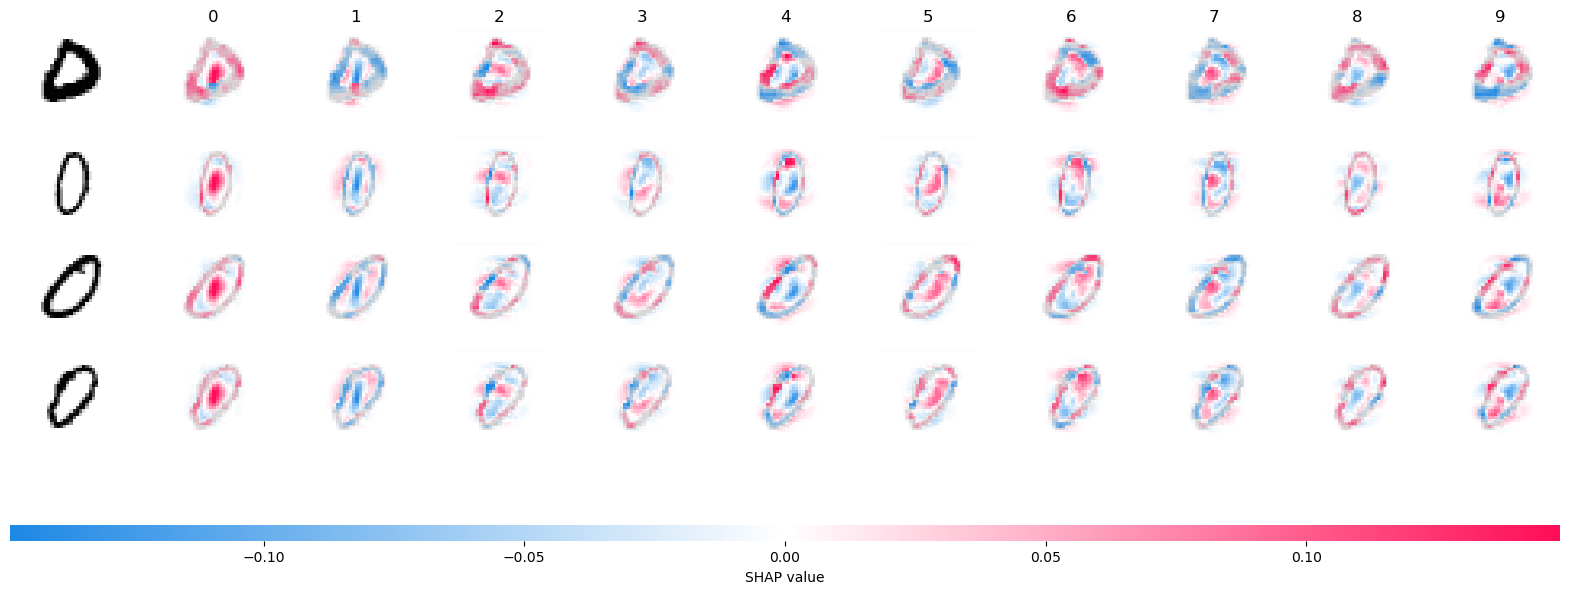

5
0.985872209072113


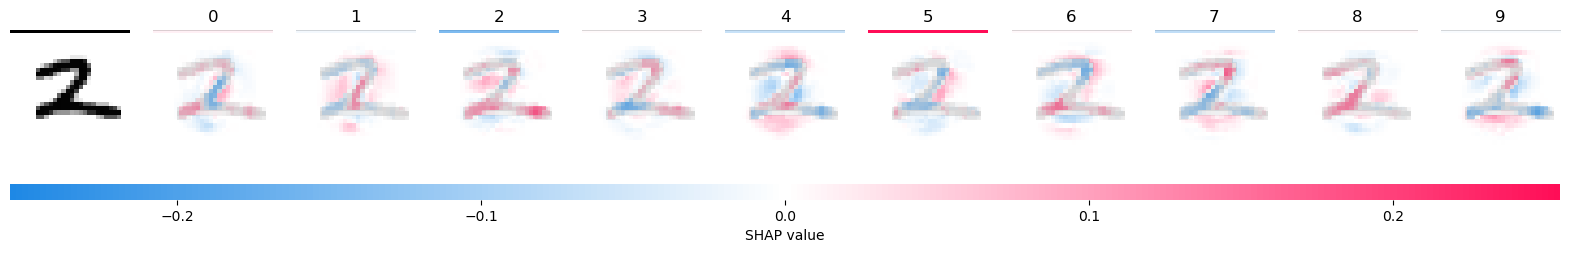

In [30]:
# (hint: use softmax to get the probabilities from the logits)

digit_0_indices = (y_test == 0).nonzero().flatten() 
digit_0_samples = X_test[digit_0_indices]  

explain_data(digit_0_samples[:4])

#Task 5.4

logits = MLP_model(encrypted_image)
probabilities = torch.softmax(logits, dim=0)
predicted_digit = torch.argmax(probabilities).item()
highest_probability = torch.max(probabilities).item()

print(predicted_digit)
print(highest_probability)

explain_data(encrypted_image)

